# Rainfall Weather Forecasting

 ### Project Description
<b>Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.</b>

<b>Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:</b>


#### 1. Problem Statement: 
1.  Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
2.  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


## Dataset Description:
Number of columns: 23

Date - The date of observation

Location -The common name of the location of the weather station

MinTemp -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall -The amount of rainfall recorded for the day in mm

Evaporation -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am.

Cloud3pm -Fraction of sky obscured by cloud

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

#### Dataset Link-

1. https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv
2. https://github.com/dsrscientist/dataset3


* <b>Importing require library for performing EDA, Data Wrangling and data cleaning</b>

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Insurance Claims dataset Csv file using pandas
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df.to_csv('D:\Weather_report.csv')

In [3]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
df.head()

No of Rows: 8425
No of Columns: 23


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

There are 23 columns in the dataset including target column

In [5]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

# Statistical Analysis

In [9]:
df.duplicated().sum()

1663

####  Let check if any whitespace, 'NA' or '-' exist in dataset.



In [10]:
df.isin([' ','NA','-']).sum().any()

False

In [11]:
df.isin(['?']).sum().any()

False

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

### Missing value check

In [13]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
Sunshine                 3994       47.406528
Evaporation              3512       41.685460
Cloud3pm                 2455       29.139466
Cloud9am                 2421       28.735905
Pressure3pm              1312       15.572700
Pressure9am              1309       15.537092
WindGustDir               991       11.762611
WindGustSpeed             991       11.762611
WindDir9am                829        9.839763
WindDir3pm                308        3.655786
RainToday                 240        2.848665
Rainfall                  240        2.848665
RainTomorrow              239        2.836795
WindSpeed3pm              107        1.270030
Humidity3pm               102        1.210682
Temp3pm                    96        1.139466
WindSpeed9am               76        0.902077
MinTemp                    75        0.890208
MaxTemp                    60        0.712166
Humidity9am                59        0.700297
Temp9am                    56     

### Stats summary

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,8350.0,13.193305,5.403596,-2.0,9.20,13.3,17.4,28.5
MaxTemp,8365.0,23.859976,6.136408,8.2,19.30,23.3,28.0,45.5
Rainfall,8185.0,2.805913,10.459379,0.0,0.00,0.0,1.0,371.0
Evaporation,4913.0,5.389395,5.044484,0.0,2.60,4.6,7.0,145.0
Sunshine,4431.0,7.632205,3.896235,0.0,4.75,8.7,10.7,13.9
WindGustSpeed,7434.0,40.174469,14.665721,7.0,30.00,39.0,50.0,107.0
WindSpeed9am,8349.0,13.847646,10.174579,0.0,6.00,13.0,20.0,63.0
WindSpeed3pm,8318.0,18.533662,9.766986,0.0,11.00,19.0,24.0,83.0
Humidity9am,8366.0,67.822496,16.833283,10.0,56.00,68.0,80.0,100.0
Humidity3pm,8323.0,51.249790,18.423774,6.0,39.00,51.0,63.0,99.0


1. in data set min temp is -2 and max temp is 28.5
2. in data set max temp almost 24 and highest max tempis 45.5

## Segregating the data

In [15]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


In [16]:
numerical_feature

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [17]:
def randomsampleimputation(df, variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [18]:
randomsampleimputation(df, "Cloud9am")
randomsampleimputation(df, "Cloud3pm")
randomsampleimputation(df, "Evaporation")
randomsampleimputation(df, "Sunshine")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,3.0,13.8,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,2.2,7.6,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.6,7.7,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,1.8,8.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,3.8,11.9,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,6.4,1.2,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,8.0,4.0,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,12.6,7.1,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,4.2,13.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,6.0,5.0,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,4.0,13.1,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Checking correlation

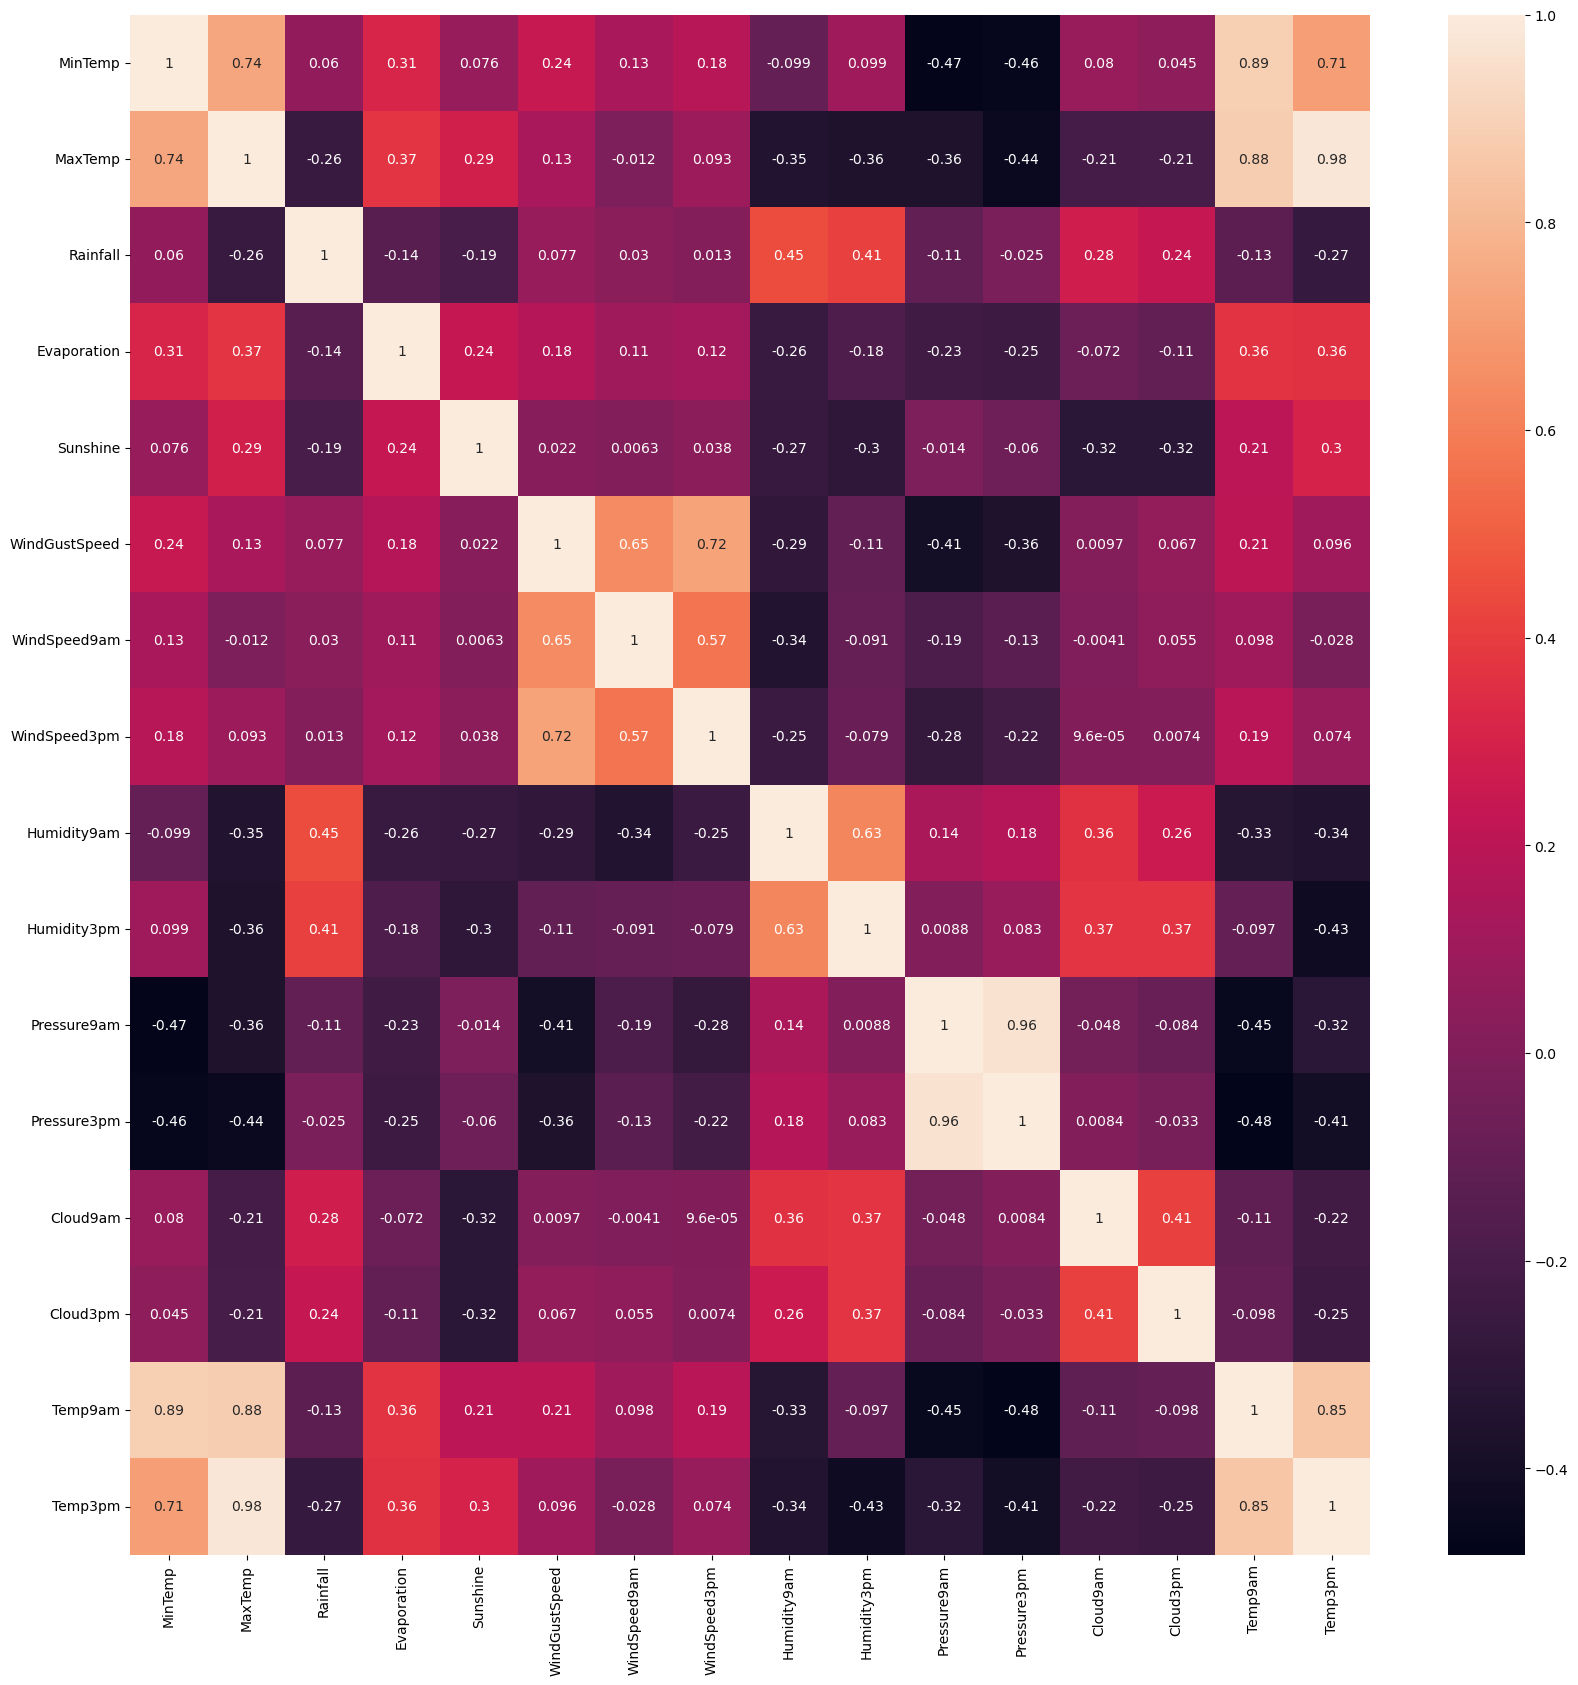

In [19]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True);

## Data visualization

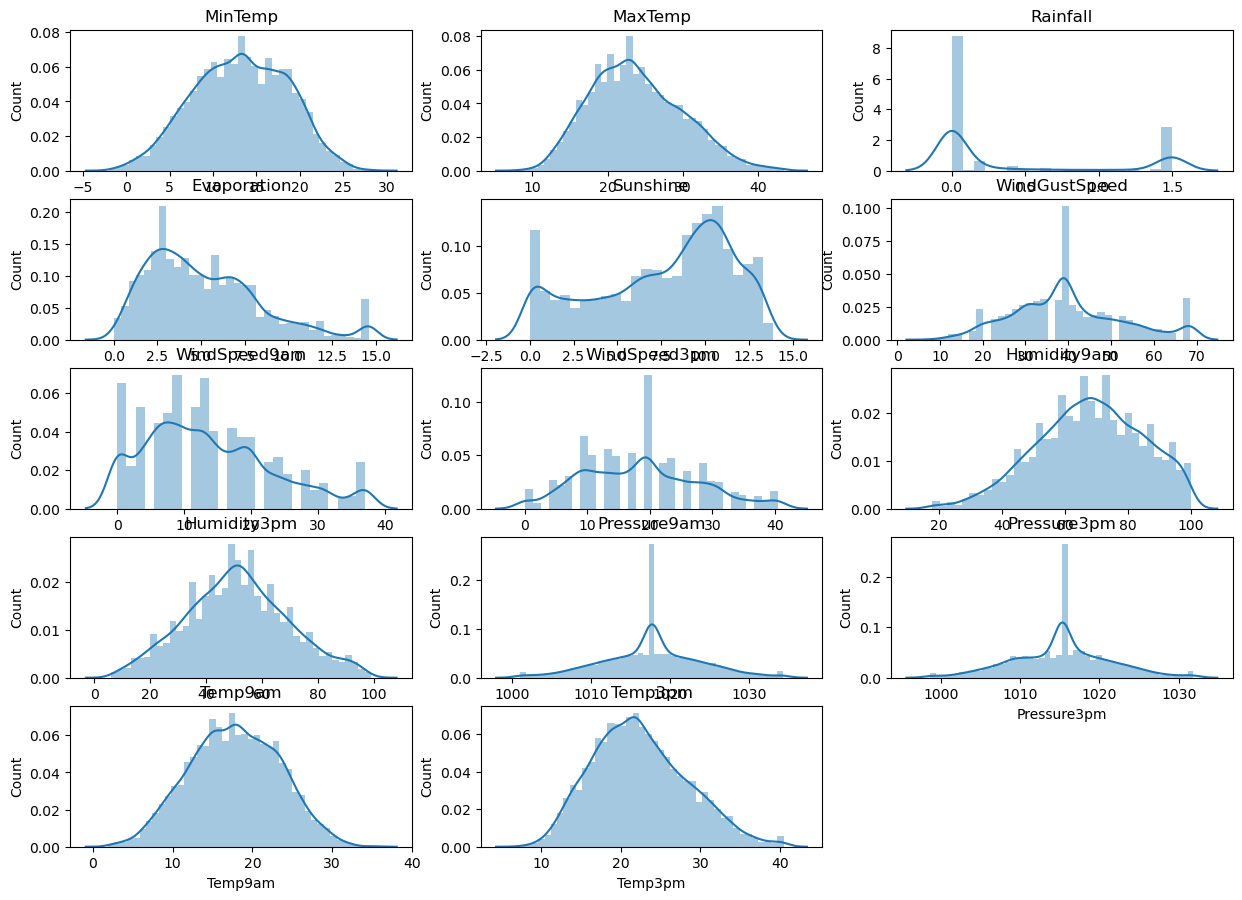

In [128]:
plt.figure(figsize=(15,15))
plotnumber=1
for feature in continuous_feature:
    data=df.copy()
    ax=plt.subplot(7,3,plotnumber)
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plotnumber+=1
plt.show()

some features have skewness
## Plotting BOx plot for outliers

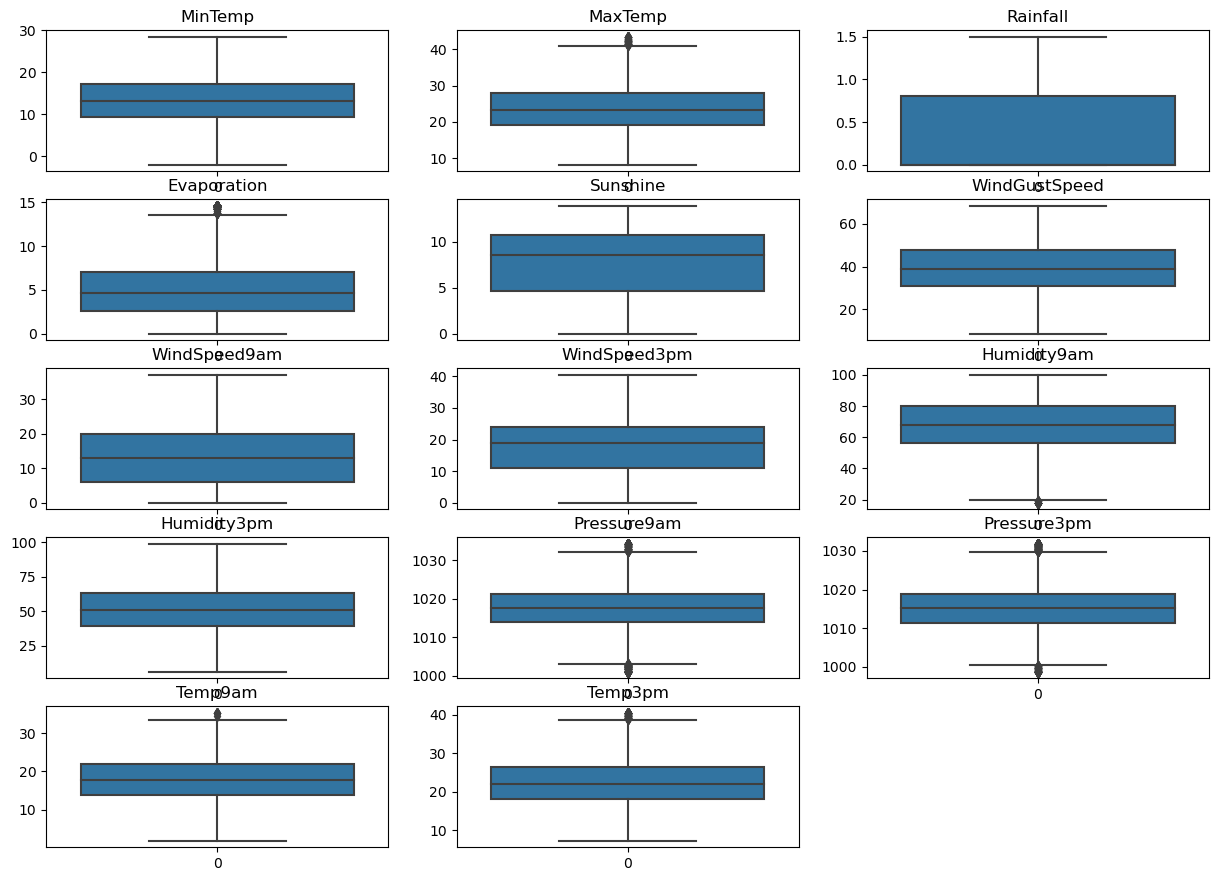

In [130]:
#for loop is used to plot a boxplot for all the continuous features to see the outliers
plt.figure(figsize=(15,15))
plotnumber=1
for feature in continuous_feature:
    data=df.copy()
    ax=plt.subplot(7,3,plotnumber)
    sns.boxplot(data[feature])
    plt.title(feature)
    plotnumber+=1
plt.show()

In [23]:
#filling null values in continuous features
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

### 2. Skewness of features

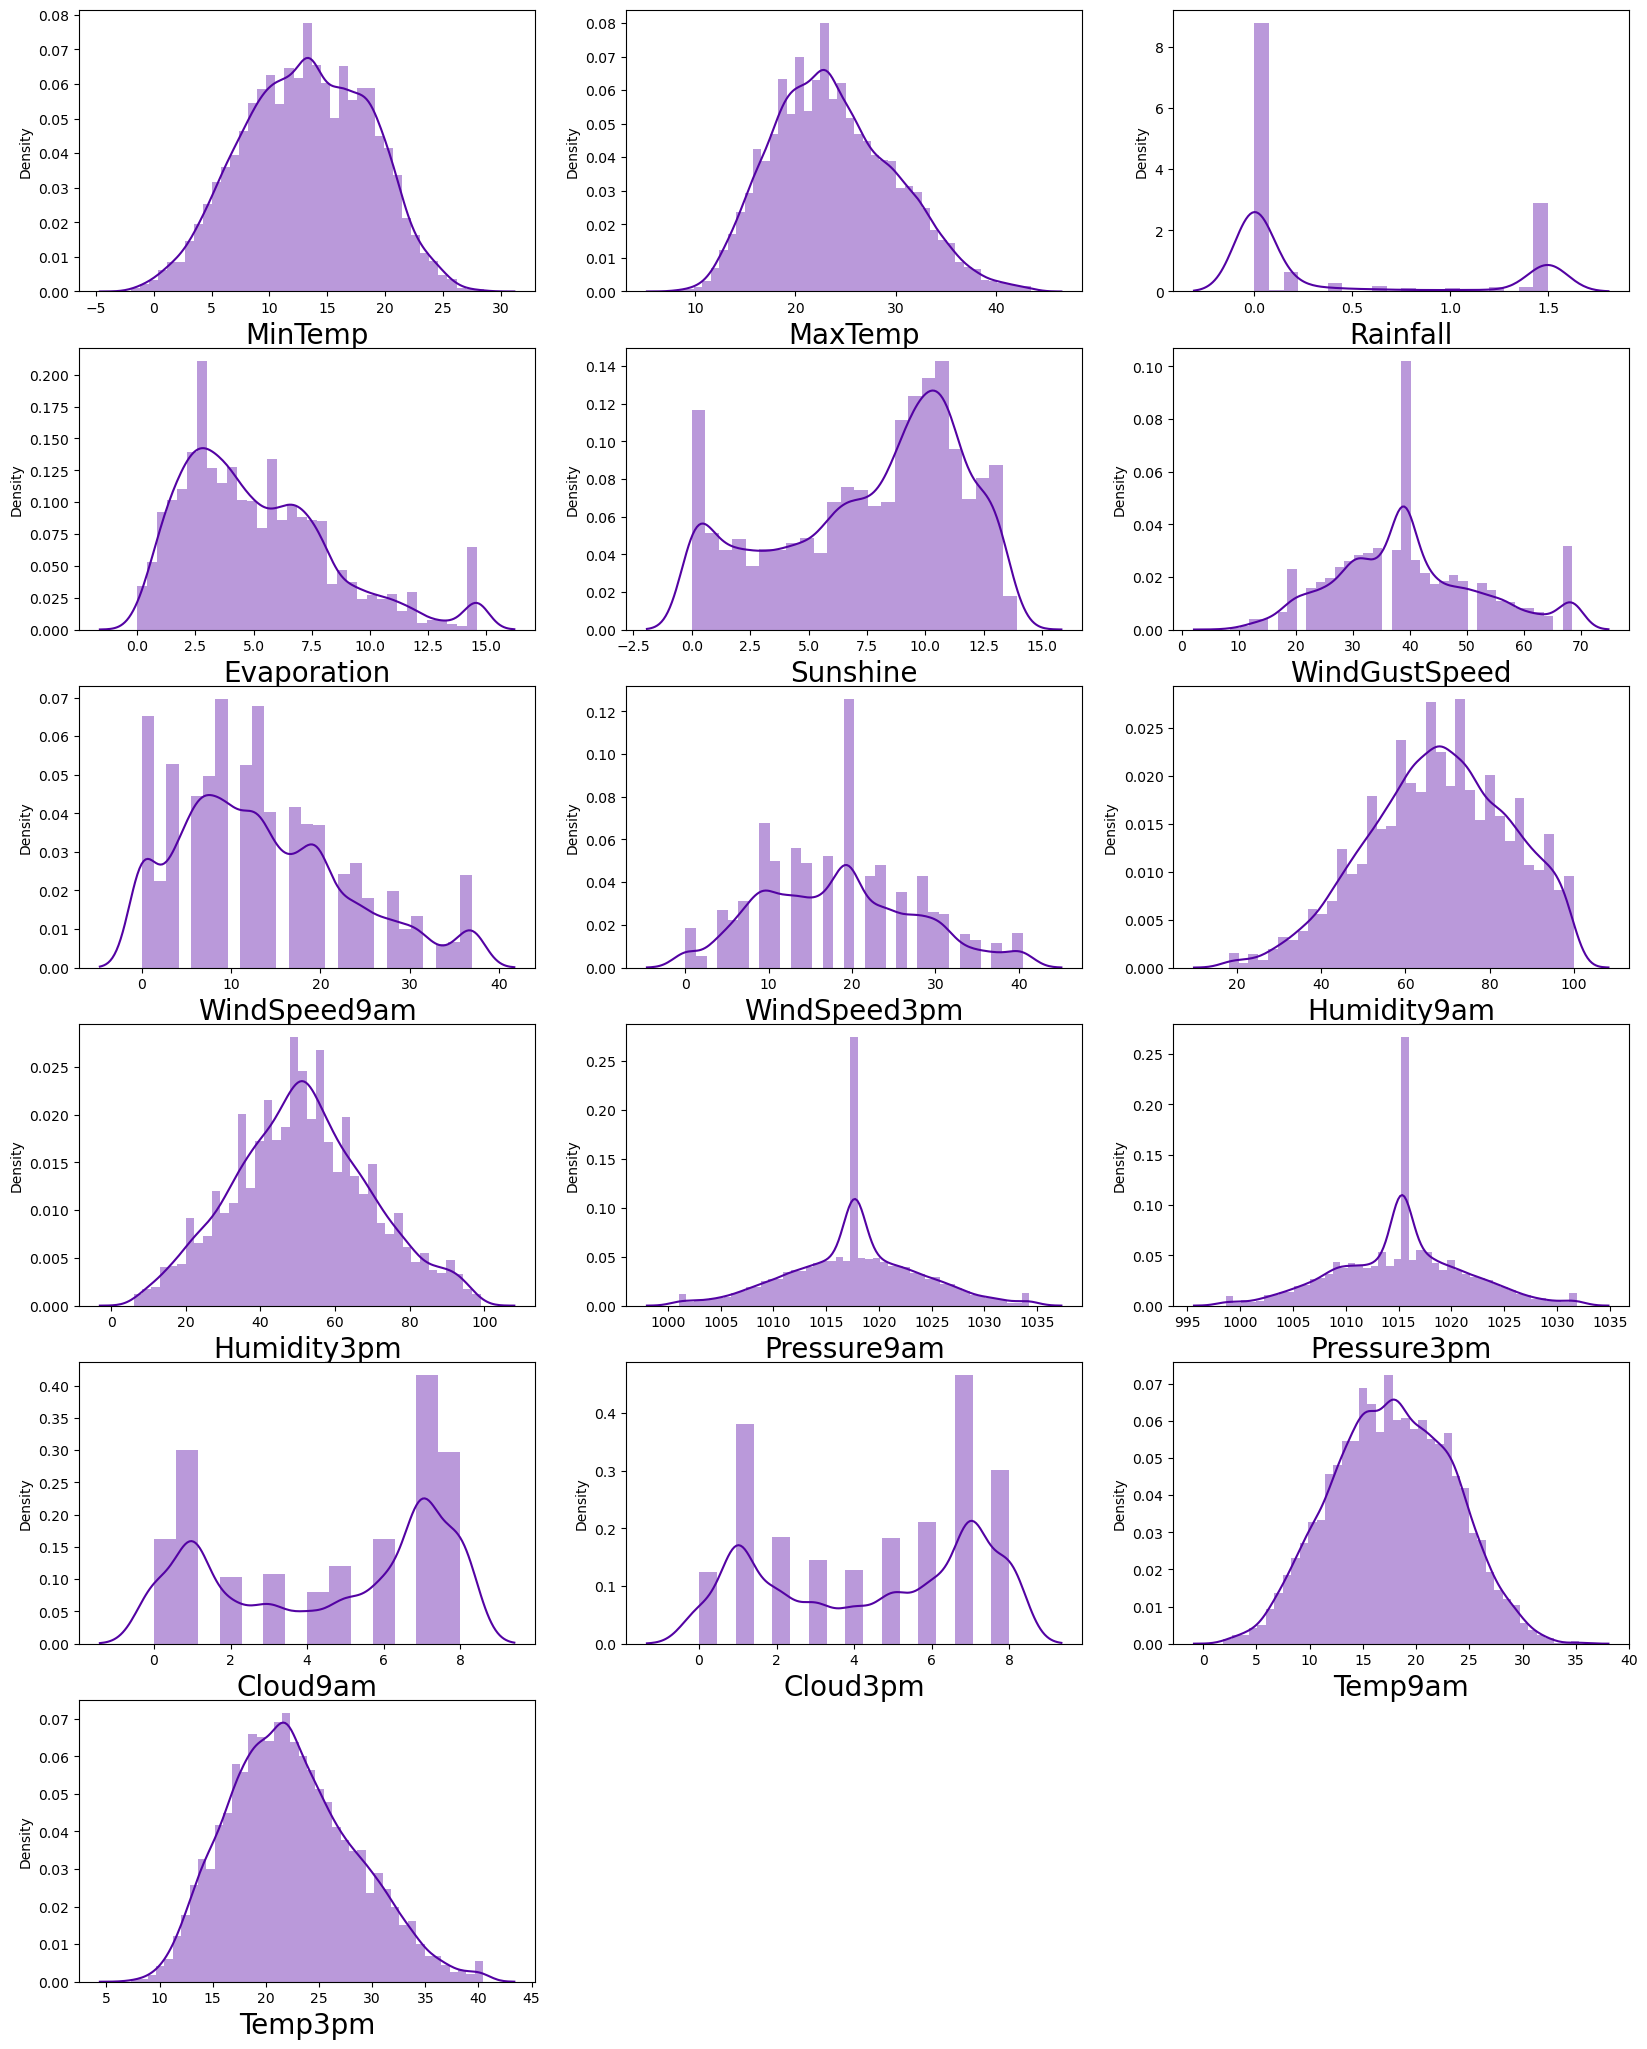

In [132]:
plt.figure(figsize=(20,30),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in numerical_feature:
    if plotnum<=21:
        plt.subplot(7,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()


In [133]:
df[numerical_feature].skew()

MinTemp         -0.090519
MaxTemp          0.378967
Rainfall         1.103155
Evaporation      0.909930
Sunshine        -0.516592
WindGustSpeed    0.404913
WindSpeed9am     0.619182
WindSpeed3pm     0.268265
Humidity9am     -0.247174
Humidity3pm      0.118776
Pressure9am     -0.002532
Pressure3pm      0.028839
Cloud9am        -0.320472
Cloud3pm        -0.230308
Temp9am         -0.019214
Temp3pm          0.385686
dtype: float64

In [25]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           0.000000
MaxTemp           0.000000
Rainfall          0.000000
Evaporation       0.000000
Sunshine          0.000000
WindGustDir      11.762611
WindGustSpeed     0.000000
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.000000
WindSpeed3pm      0.000000
Humidity9am       0.000000
Humidity3pm       0.000000
Pressure9am       0.000000
Pressure3pm       0.000000
Cloud9am          0.000000
Cloud3pm          0.000000
Temp9am           0.000000
Temp3pm           0.000000
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

In [26]:
discrete_feature

['Cloud9am', 'Cloud3pm']

In [27]:
# filling discreate features columns null values using MODE

def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)
mode_nan(df,"Cloud9am")
mode_nan(df,"Cloud3pm")

# Encoding

In [28]:
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,3.0,13.8,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,2.2,7.6,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,4.6,7.7,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,1.8,8.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,3.8,11.9,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,6.4,1.2,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,8.0,4.0,10.1,22.4,0,0
8421,2017-06-22,Uluru,3.6,25.3,0.0,12.6,7.1,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,0,0
8422,2017-06-23,Uluru,5.4,26.9,0.0,4.2,13.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,6.0,5.0,12.5,26.1,0,0
8423,2017-06-24,Uluru,7.8,27.0,0.0,4.0,13.1,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [29]:
for feature in categorical_feature:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Date Index(['2015-01-26', '2017-02-28', '2014-04-26', '2014-04-27', '2017-02-25',
       '2017-02-26', '2015-11-04', '2015-11-03', '2017-02-27', '2017-03-01',
       ...
       '2013-01-11', '2013-01-10', '2013-01-09', '2013-01-08', '2013-01-07',
       '2013-01-05', '2013-01-04', '2013-01-03', '2013-01-02', '2017-06-25'],
      dtype='object', name='Date', length=3004)
Location Index(['CoffsHarbour', 'Wollongong', 'Melbourne', 'Williamtown', 'Newcastle',
       'Penrith', 'Brisbane', 'Adelaide', 'Albury', 'PerthAirport', 'Darwin',
       'Uluru'],
      dtype='object', name='Location')
WindGustDir Index(['NNW', 'SSW', 'N', 'WSW', 'NW', 'SW', 'NNE', 'S', 'WNW', 'NE', 'SSE',
       'SE', 'ESE', 'W', 'ENE', 'E'],
      dtype='object', name='WindGustDir')
WindDir9am Index(['N', 'WNW', 'SW', 'W', 'NNE', 'NNW', 'SSW', 'ESE', 'WSW', 'S', 'NW',
       'NE', 'SSE', 'SE', 'ENE', 'E'],
      dtype='object', name='WindDir9am')
WindDir3pm Index(['NNW', 'SSW', 'N', 'NW', 'S', 'WSW', 'SW', 'NNE', 'S

In [30]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

In [31]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

In [32]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [33]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,3.0,13.8,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,2.2,7.6,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,4.6,7.7,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,1.8,8.0,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,3.8,11.9,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,6.4,1.2,15.0,31.0,13.0,13.0,13.0,11.0,51.0,24.0,1024.6,1020.3,8.0,4.0,10.1,22.4,0,0
8421,2017-06-22,Uluru,3.6,25.3,0.0,12.6,7.1,0.0,22.0,13.0,2.0,13.0,9.0,56.0,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,0,0
8422,2017-06-23,Uluru,5.4,26.9,0.0,4.2,13.0,3.0,37.0,13.0,3.0,9.0,9.0,53.0,24.0,1021.0,1016.8,6.0,5.0,12.5,26.1,0,0
8423,2017-06-24,Uluru,7.8,27.0,0.0,4.0,13.1,12.0,28.0,11.0,2.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


Now there is no missing values present in dataset

In [35]:
df1 = df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()
df1

RainTomorrow,0,1
Location,,
Adelaide,160.0,45.0
Albury,708.0,199.0
Brisbane,444.0,135.0
CoffsHarbour,425.0,186.0
Darwin,218.0,32.0
Melbourne,1216.0,406.0
Newcastle,624.0,198.0
Penrith,366.0,116.0
PerthAirport,962.0,242.0


In [36]:
df1[1].sort_values(ascending = False)

Location
Melbourne       406.0
Williamtown     306.0
PerthAirport    242.0
Albury          199.0
Newcastle       198.0
CoffsHarbour    186.0
Brisbane        135.0
Wollongong      126.0
Penrith         116.0
Adelaide         45.0
Darwin           32.0
Uluru             NaN
Name: 1, dtype: float64

In [37]:
df1[1].sort_values(ascending = False).index

Index(['Melbourne', 'Williamtown', 'PerthAirport', 'Albury', 'Newcastle',
       'CoffsHarbour', 'Brisbane', 'Wollongong', 'Penrith', 'Adelaide',
       'Darwin', 'Uluru'],
      dtype='object', name='Location')

In [38]:
len(df1[1].sort_values(ascending = False).index)

12

In [39]:
location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
df["Location"] = df["Location"].map(location)

In [40]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%dT", errors = "coerce")

In [41]:
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,30,13.4,22.9,0.6,3.0,13.8,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,0,0,12,1
1,2008-12-02,30,7.4,25.1,0.0,2.2,7.6,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,0,0,12,2
2,2008-12-03,30,12.9,25.7,0.0,4.6,7.7,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,30,9.2,28.0,0.0,1.8,8.0,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,0,0,12,4
4,2008-12-05,30,17.5,32.3,1.0,3.8,11.9,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,49,2.8,23.4,0.0,6.4,1.2,15.0,31.0,13.0,13.0,13.0,11.0,51.0,24.0,1024.6,1020.3,8.0,4.0,10.1,22.4,0,0,6,21
8421,2017-06-22,49,3.6,25.3,0.0,12.6,7.1,0.0,22.0,13.0,2.0,13.0,9.0,56.0,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,0,0,6,22
8422,2017-06-23,49,5.4,26.9,0.0,4.2,13.0,3.0,37.0,13.0,3.0,9.0,9.0,53.0,24.0,1021.0,1016.8,6.0,5.0,12.5,26.1,0,0,6,23
8423,2017-06-24,49,7.8,27.0,0.0,4.0,13.1,12.0,28.0,11.0,2.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,6,24


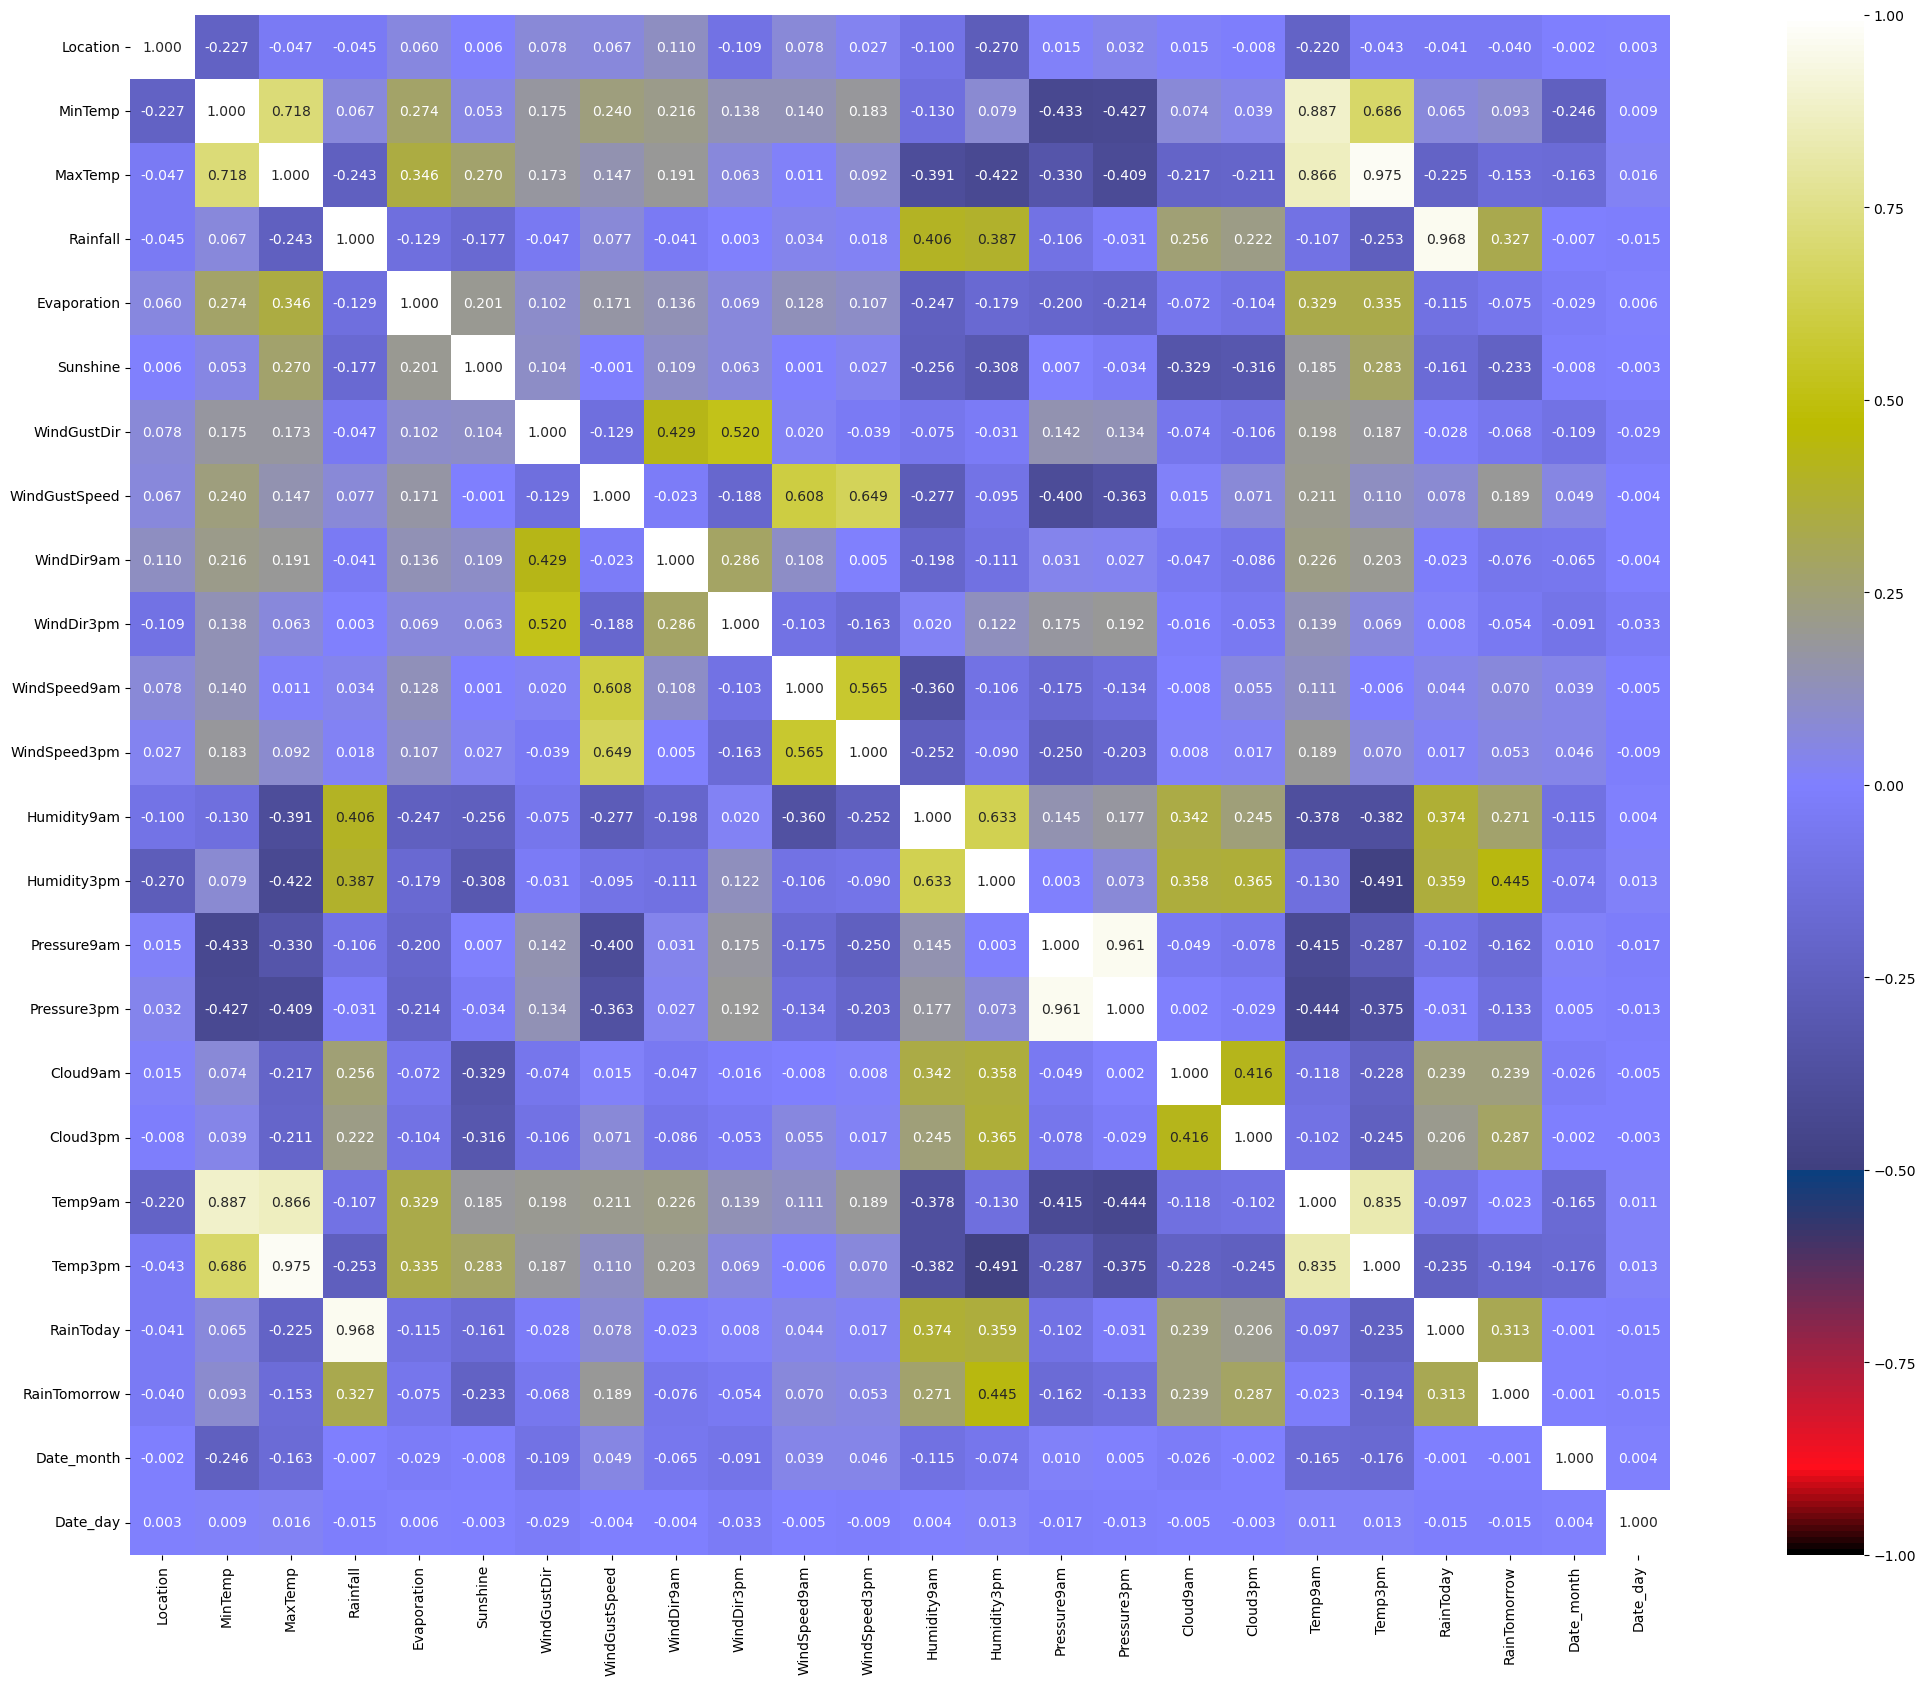

In [134]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', cmap="gist_stern")
plt.show()

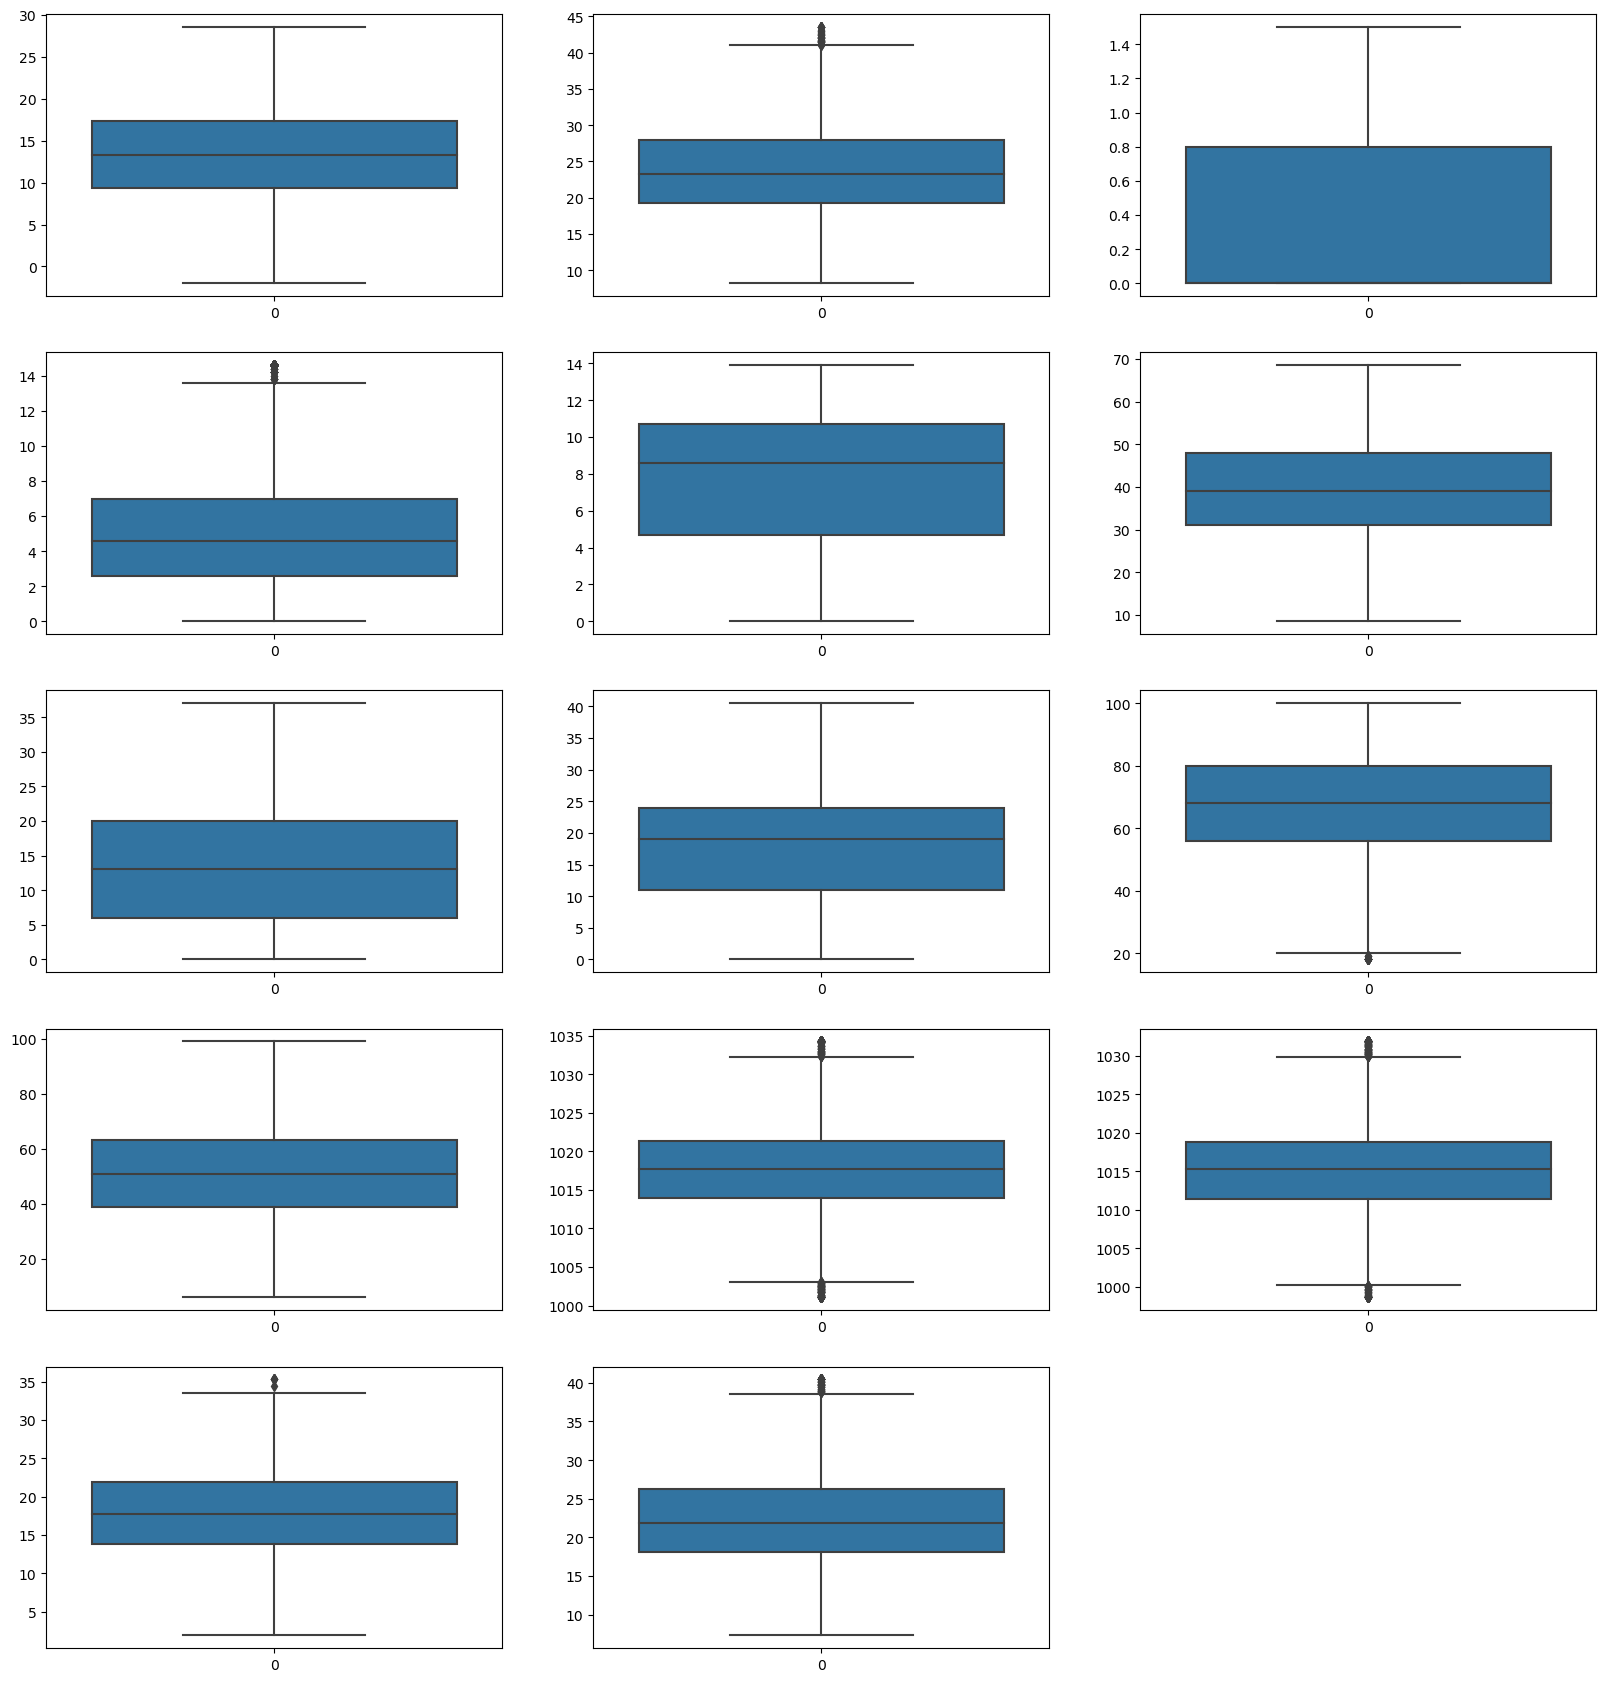

In [125]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for feature in continuous_feature:
    data=df.copy()
    ax=plt.subplot(7,3,plotnumber)
    sns.boxplot(data[feature])
    plotnumber+=1
plt.show()
    

In [45]:
for feature in continuous_feature:
    print(feature)

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Temp9am
Temp3pm


# Removing Outliers

In [ ]:
df1=df.copy()
Q1 = df1.quantile(0)
Q3= df1.quantile(0.85)
IQR = Q3 - Q1
print(IQR)


In [ ]:
df2 = df1[~((df1< (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df2.shape)

In [ ]:
#Data Loss
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((32536-28306)/32536)*100,'%')

In [46]:
IQR=df.MinTemp.quantile(0.75)-df.MinTemp.quantile(0.25)
lower_bridge=df.MinTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MinTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-2.6999999999999993 29.3


In [48]:
df.loc[df['MinTemp']>=30.45,'MinTemp']=30.45
df.loc[df['MinTemp']<=-5.95,'MinTemp']=-5.95

In [49]:
IQR=df.MaxTemp.quantile(0.75)-df.MaxTemp.quantile(0.25)
lower_bridge=df.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

6.250000000000002 41.05


In [50]:
df.loc[df['MaxTemp']>=43.5,'MaxTemp']=43.5
df.loc[df['MaxTemp']<=2.7,'MaxTemp']=2.7

In [51]:
IQR=df.Rainfall.quantile(0.75)-df.Rainfall.quantile(0.25)
lower_bridge=df.Rainfall.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1.2000000000000002 2.0


In [52]:
df.loc[df['Rainfall']>=1.5,'Rainfall']=1.5
df.loc[df['Rainfall']<=-0.89,'Rainfall']=-0.89

In [53]:
IQR=df.Evaporation.quantile(0.75)-df.Evaporation.quantile(0.25)
lower_bridge=df.Evaporation.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Evaporation.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-4.0 13.600000000000001


In [54]:
df.loc[df['Evaporation']>=14.6,'Evaporation']=14.6
df.loc[df['Evaporation']<=-4.6,'Evaporation']=-4.6

In [55]:
IQR=df.WindGustSpeed.quantile(0.75)-df.WindGustSpeed.quantile(0.25)
lower_bridge=df.WindGustSpeed.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindGustSpeed.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

5.5 73.5


In [56]:

df.loc[df['WindGustSpeed']>=68.5,'WindGustSpeed']=68.5
df.loc[df['WindGustSpeed']<=8.5,'WindGustSpeed']=8.5

In [57]:
IQR=df.WindSpeed9am.quantile(0.75)-df.WindSpeed9am.quantile(0.25)
lower_bridge=df.WindSpeed9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-15.0 41.0


In [58]:
df.loc[df['WindSpeed9am']>=37,'WindSpeed9am']=37
df.loc[df['WindSpeed9am']<=-11,'WindSpeed9am']=-11

In [59]:
IQR=df.WindSpeed3pm.quantile(0.75)-df.WindSpeed3pm.quantile(0.25)
lower_bridge=df.WindSpeed3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-8.5 43.5


In [60]:
df.loc[df['WindSpeed3pm']>40.5,'WindSpeed3pm']=40.5
df.loc[df['WindSpeed3pm']<=-3.5,'WindSpeed3pm']=-3.5

In [61]:
IQR=df.Humidity9am.quantile(0.75)-df.Humidity9am.quantile(0.25)
lower_bridge=df.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

20.0 116.0


In [62]:
df.loc[df['Humidity9am']>=122,'Humidity9am']=122
df.loc[df['Humidity9am']<=18,'Humidity9am']=18

In [63]:
IQR=df.Pressure9am.quantile(0.75)-df.Pressure9am.quantile(0.25)
lower_bridge=df.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1003.0500000000001 1032.25


In [64]:
df.loc[df['Pressure9am']>=1034.25,'Pressure9am']=1034.25
df.loc[df['Pressure9am']<=1001.05,'Pressure9am']=1001.05

In [65]:
IQR=df.Pressure3pm.quantile(0.75)-df.Pressure3pm.quantile(0.25)
lower_bridge=df.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1000.3 1029.8999999999999


In [66]:
df.loc[df['Pressure3pm']>=1031.85,'Pressure3pm']=1031.85
df.loc[df['Pressure3pm']<=998.65,'Pressure3pm']=998.65

In [67]:
IQR=df.Temp9am.quantile(0.75)-df.Temp9am.quantile(0.25)
lower_bridge=df.Temp9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1.650000000000004 34.05


In [68]:
df.loc[df['Temp9am']>=35.3,'Temp9am']=35.3
df.loc[df['Temp9am']<=-1.49,'Temp9am']=-1.49

In [69]:
IQR=df.Temp3pm.quantile(0.75)-df.Temp3pm.quantile(0.25)
lower_bridge=df.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

5.8000000000000025 38.6


In [70]:
df.loc[df['Temp3pm']>=40.45,'Temp3pm']=40.45
df.loc[df['Temp3pm']<=2.45,'Temp3pm']=2.45

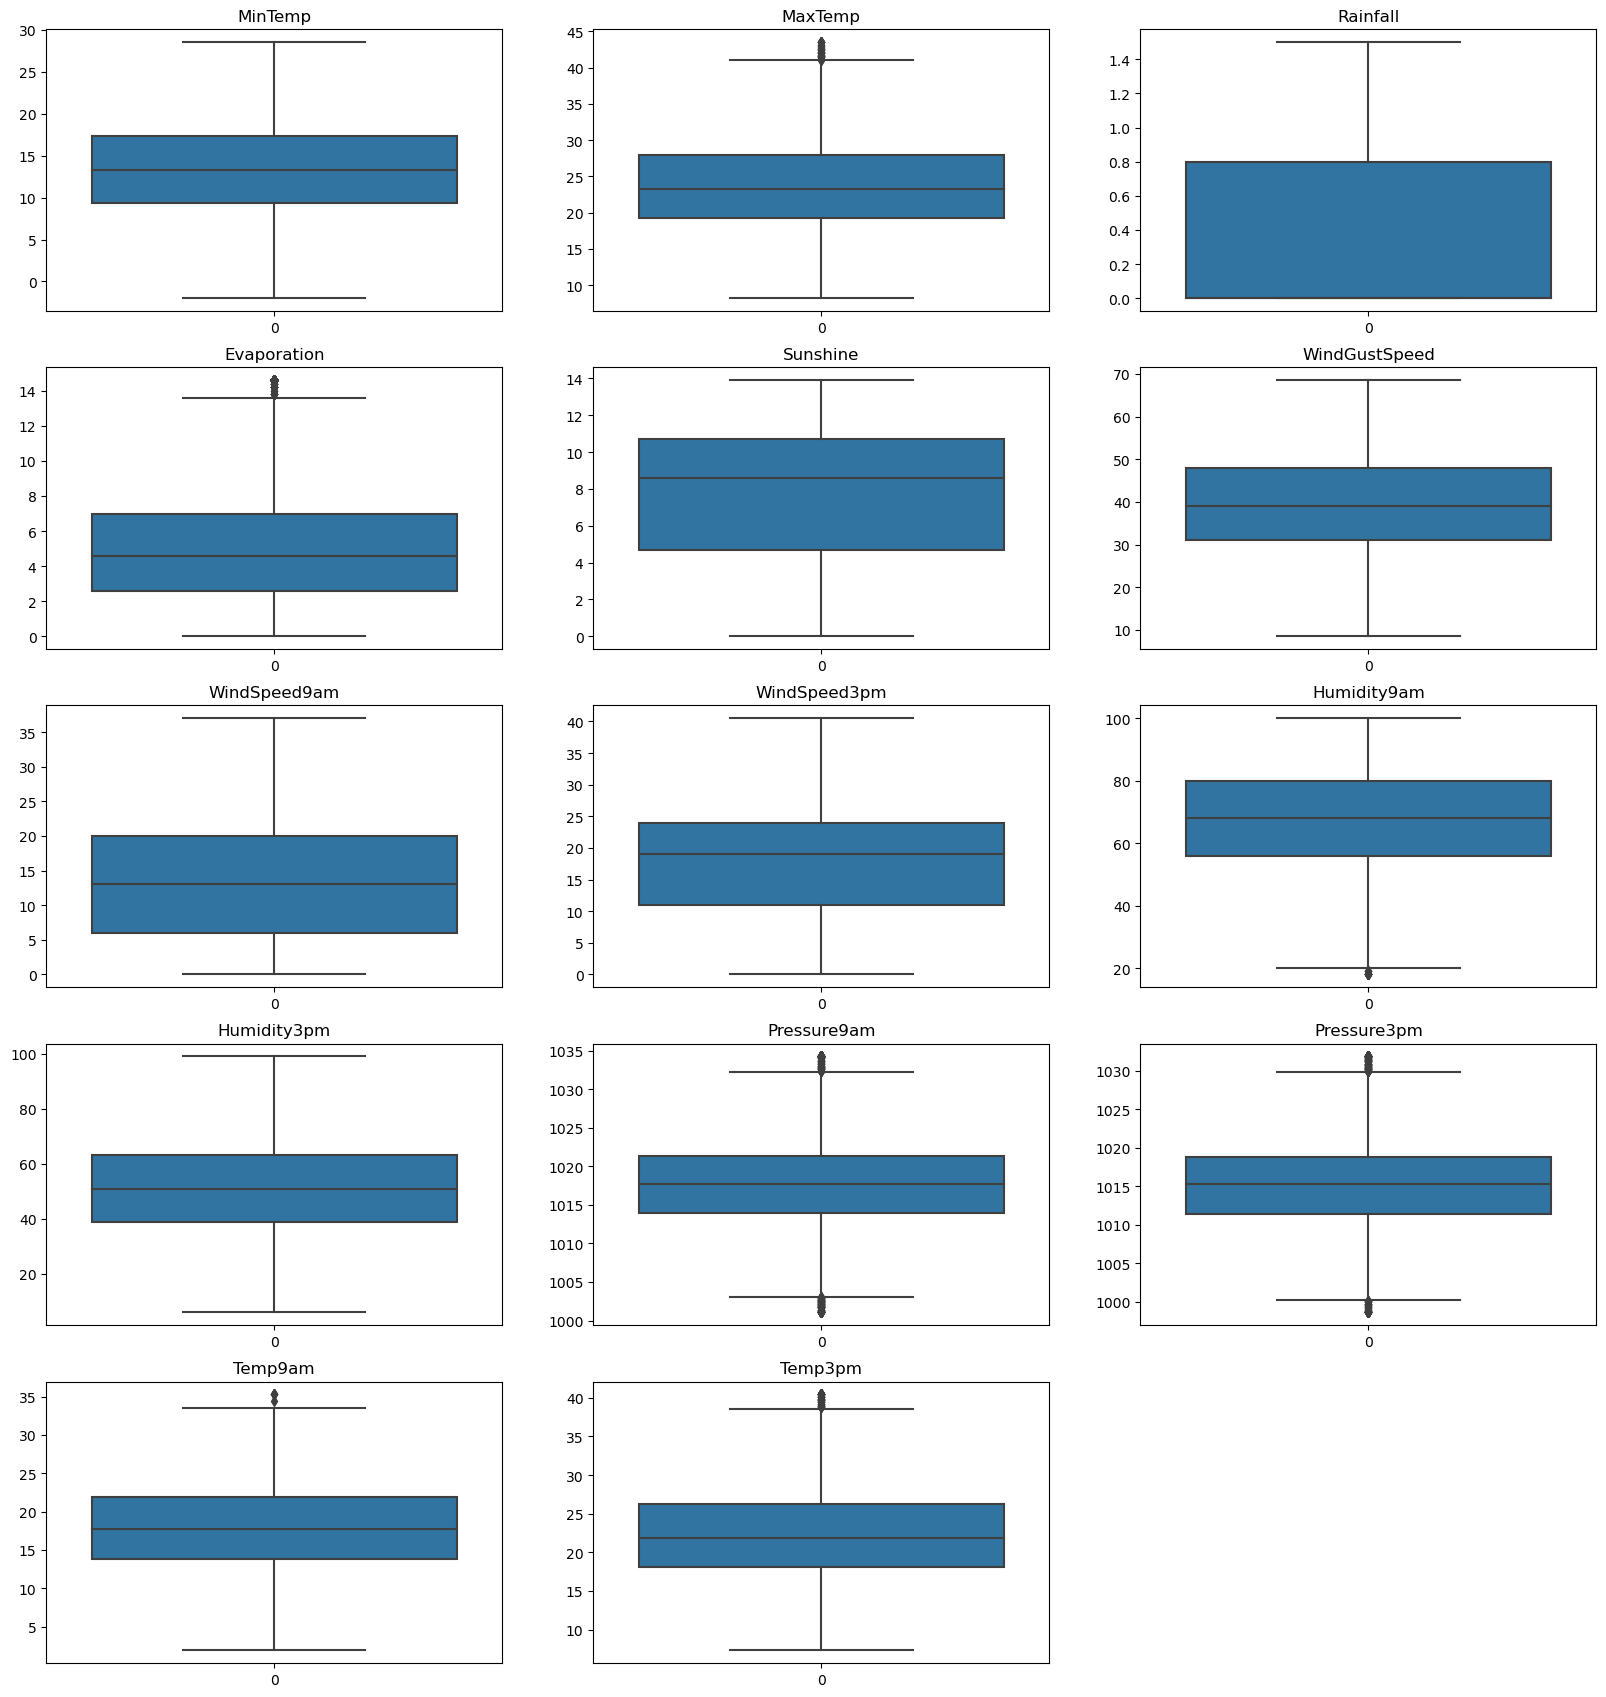

In [124]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for feature in continuous_feature:
    data=df.copy()
    ax=plt.subplot(7,3,plotnumber)
    sns.boxplot(data[feature])
    plt.title(feature)
    plotnumber+=1
plt.show()

In [72]:
def qq_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show();

MinTemp


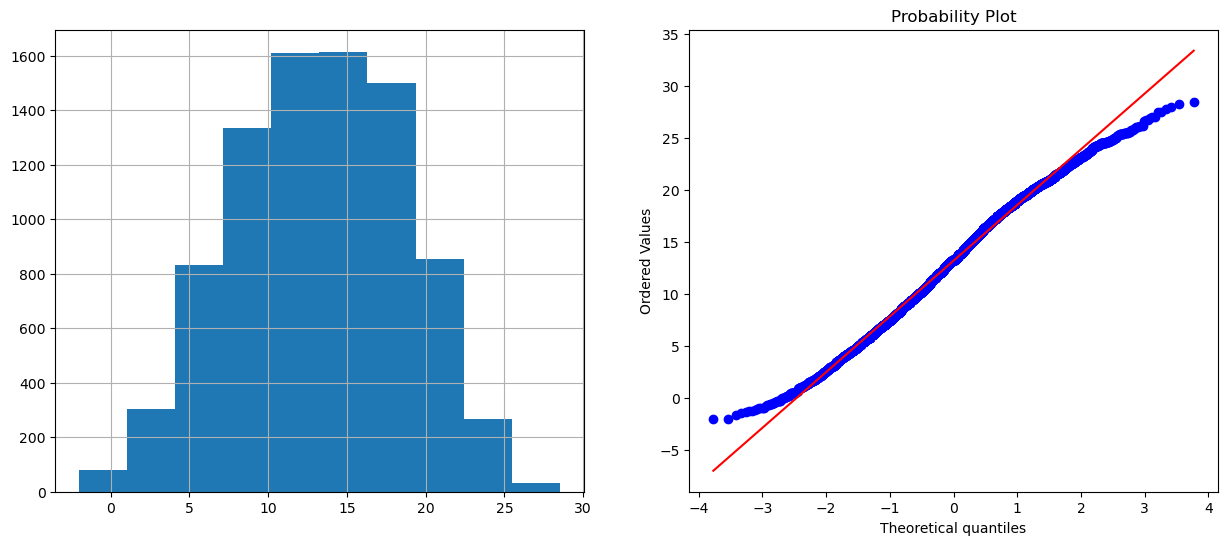

MaxTemp


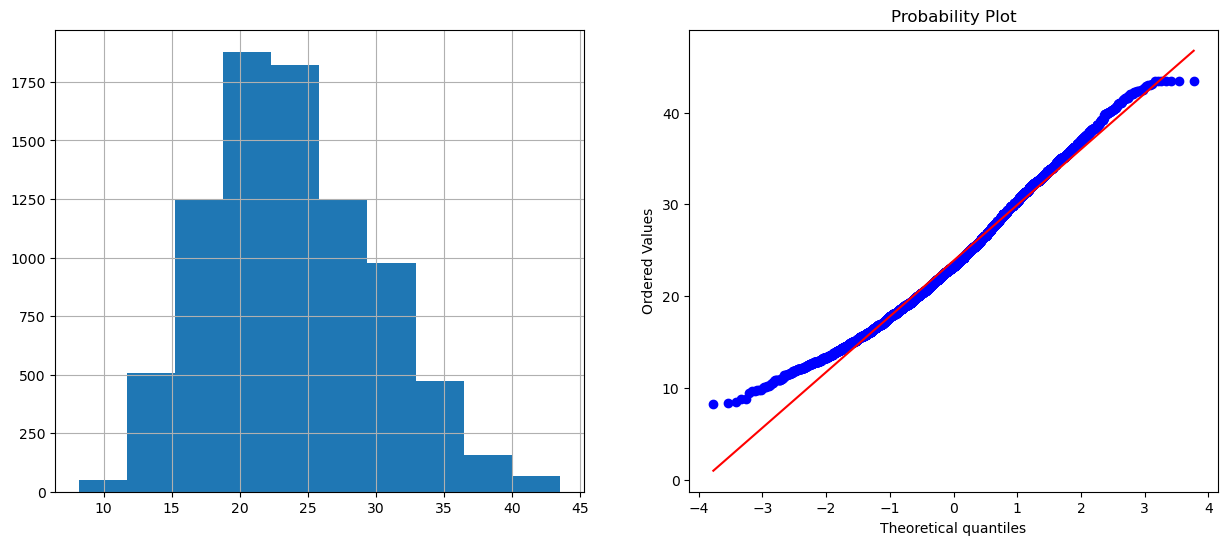

Rainfall


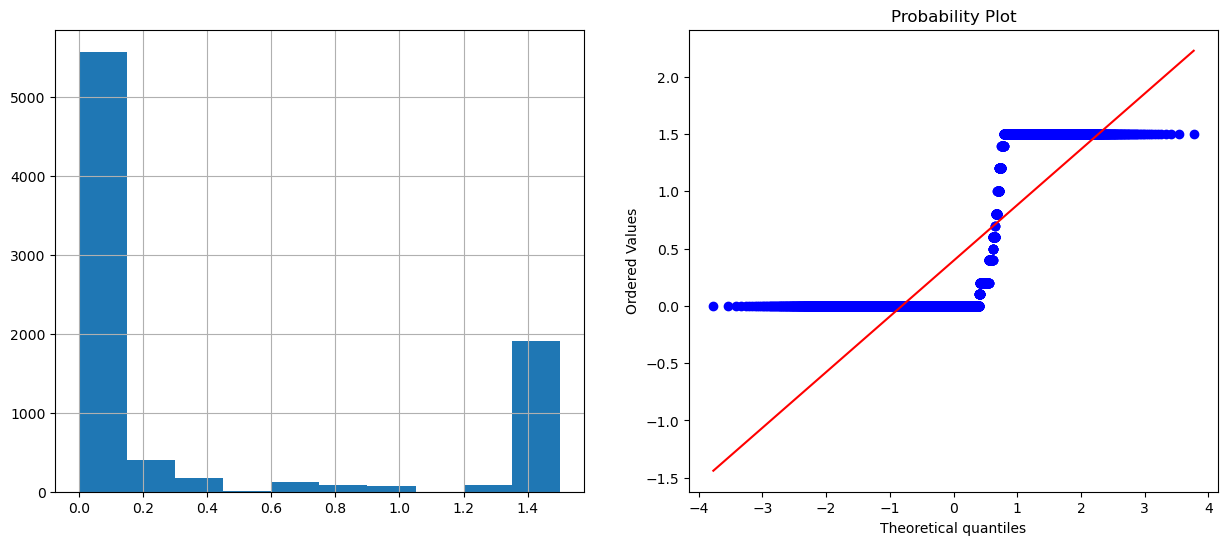

Evaporation


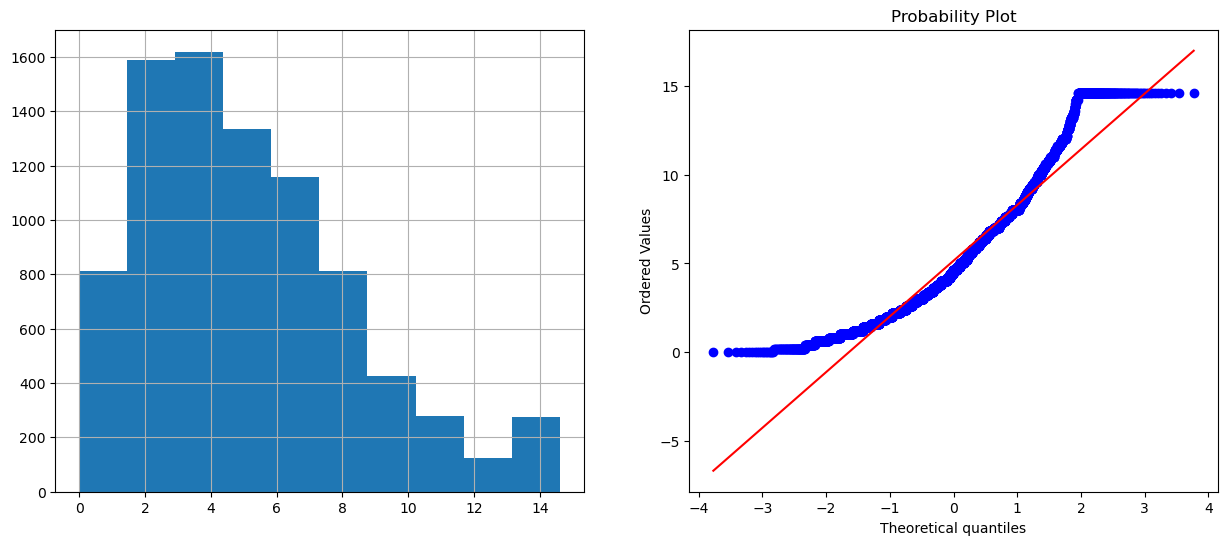

Sunshine


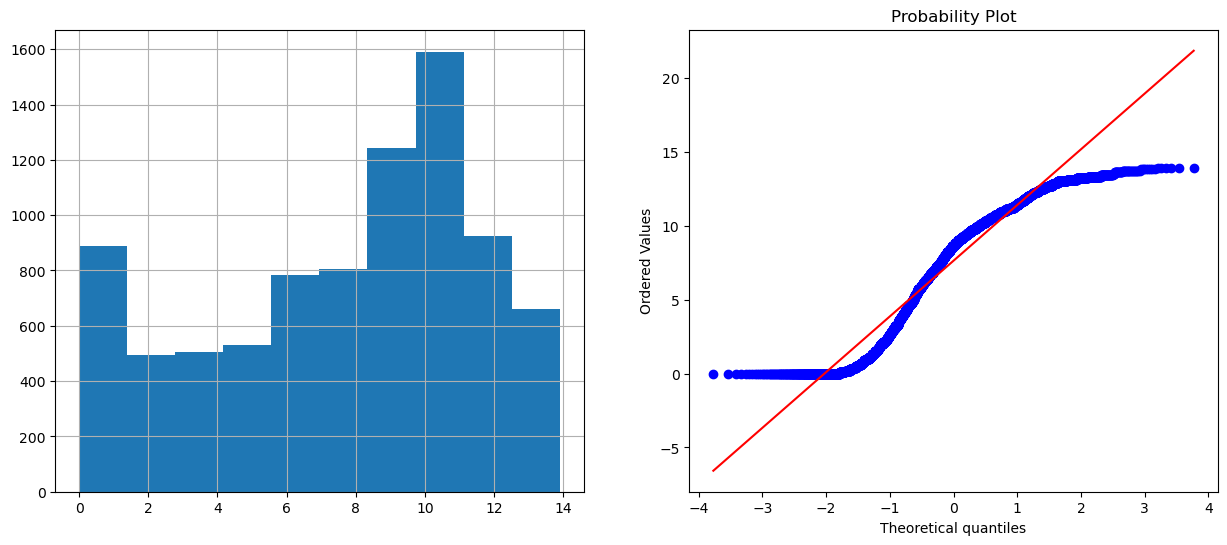

WindGustSpeed


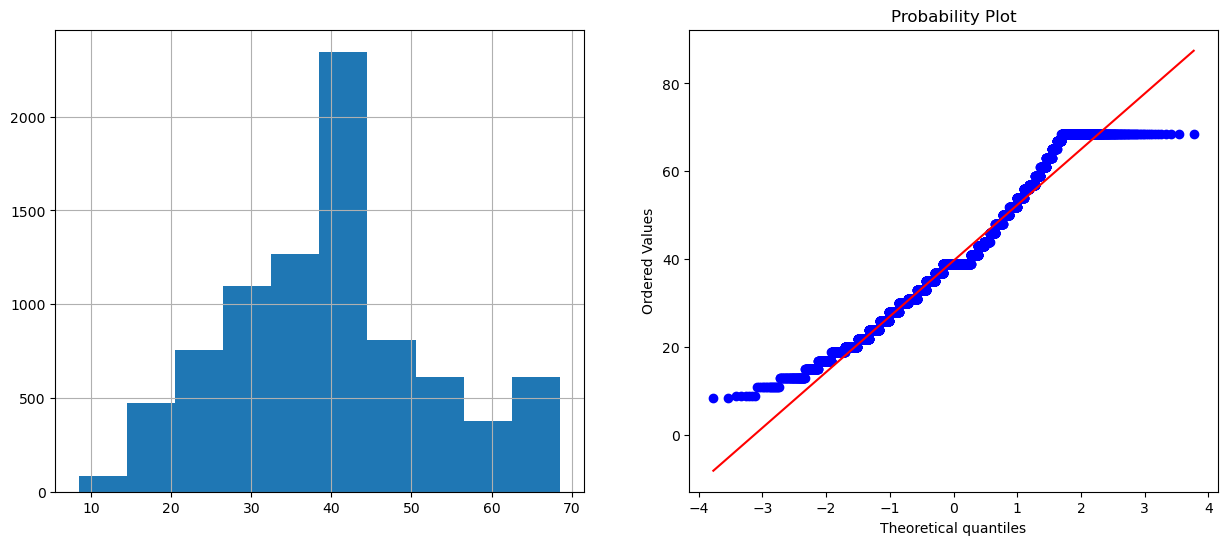

WindSpeed9am


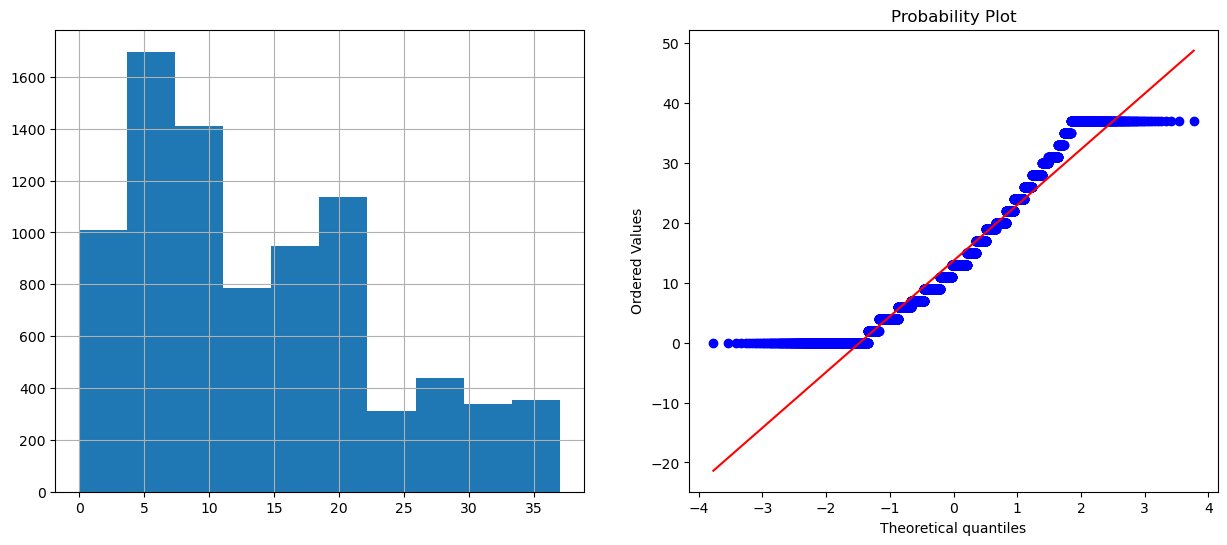

WindSpeed3pm


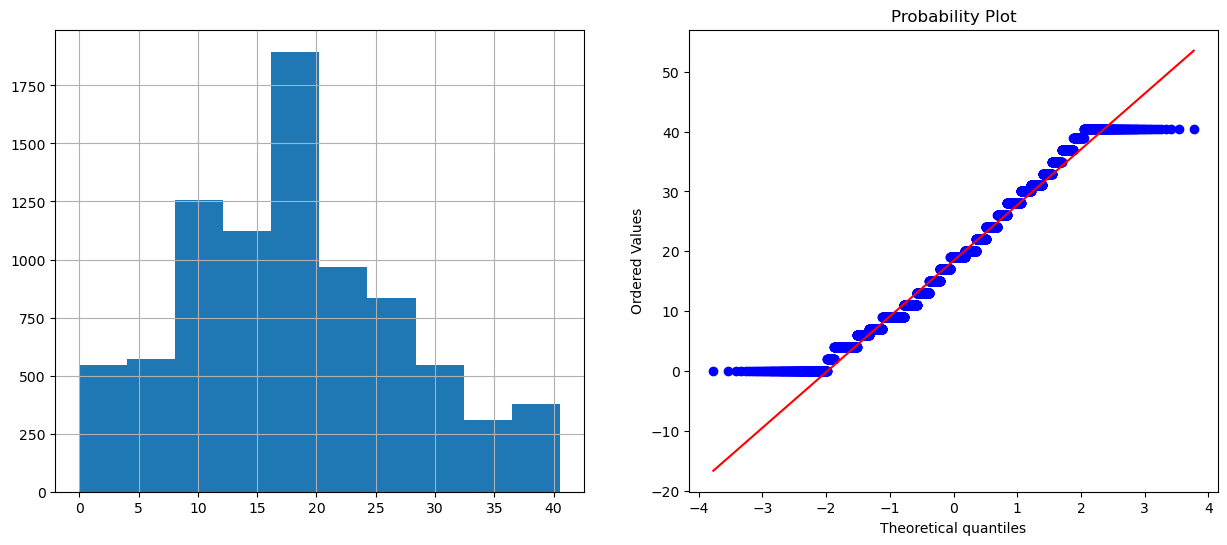

Humidity9am


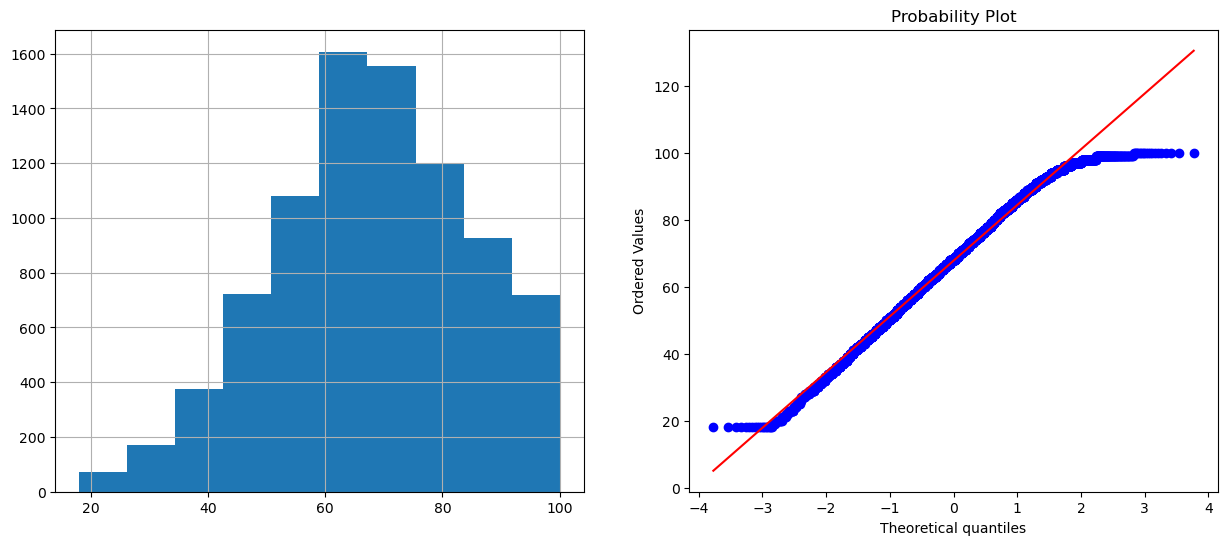

Humidity3pm


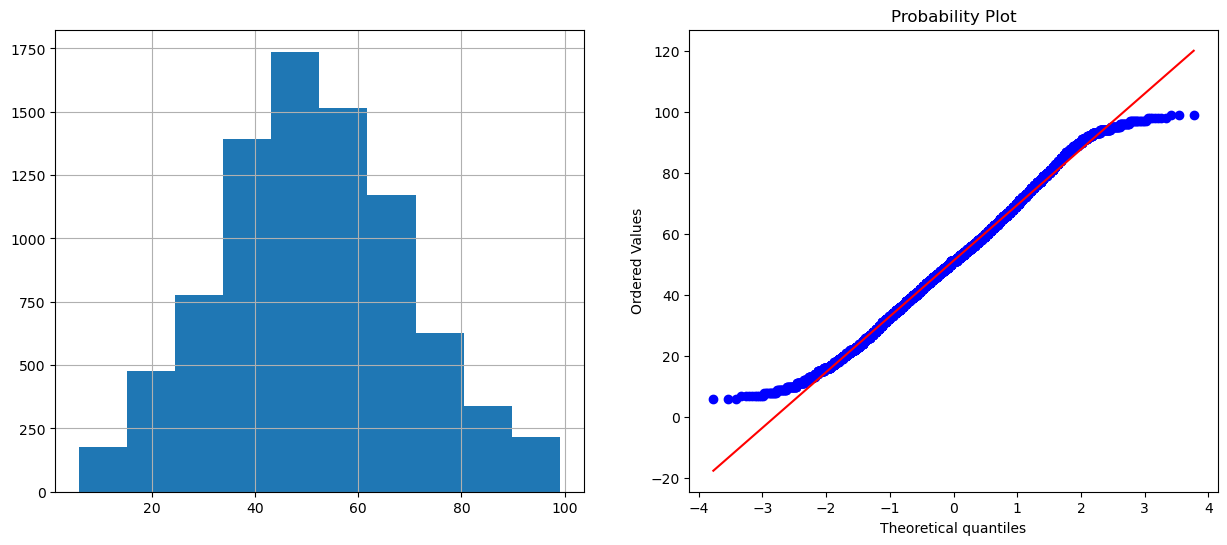

Pressure9am


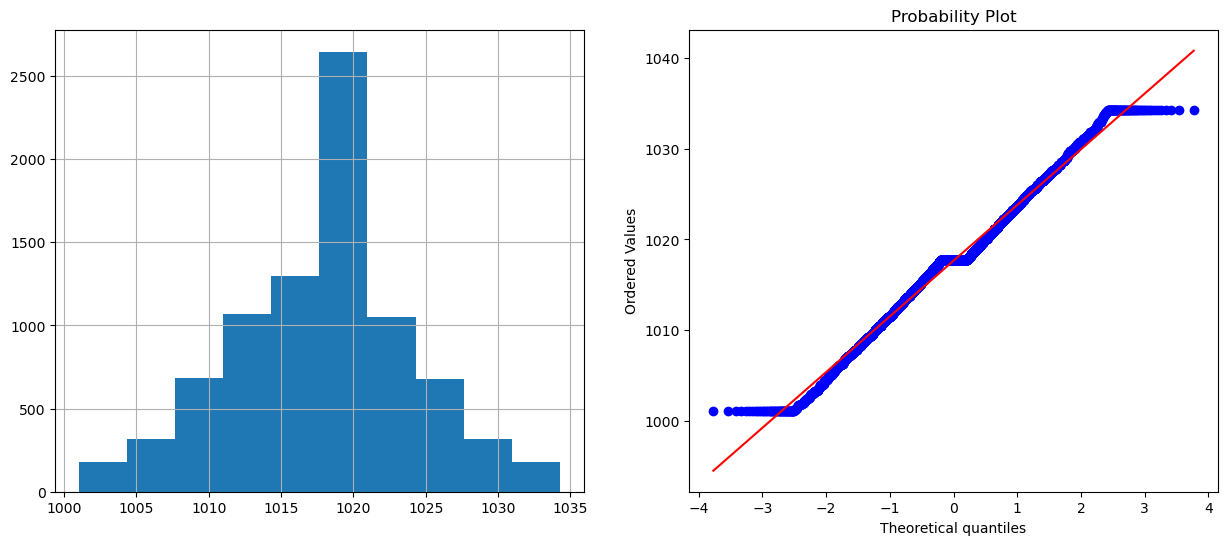

Pressure3pm


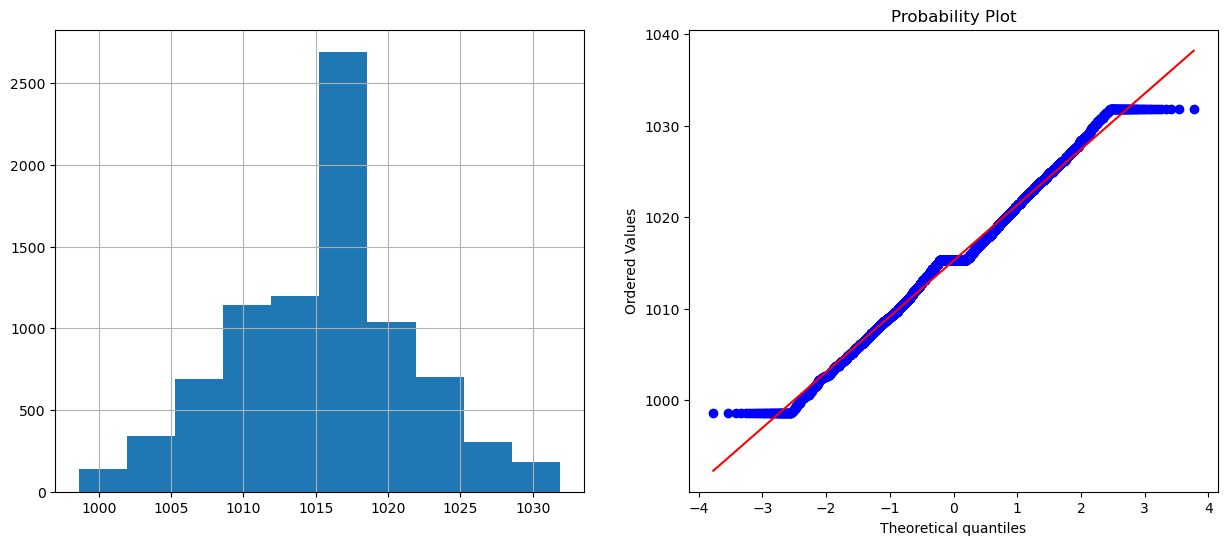

Temp9am


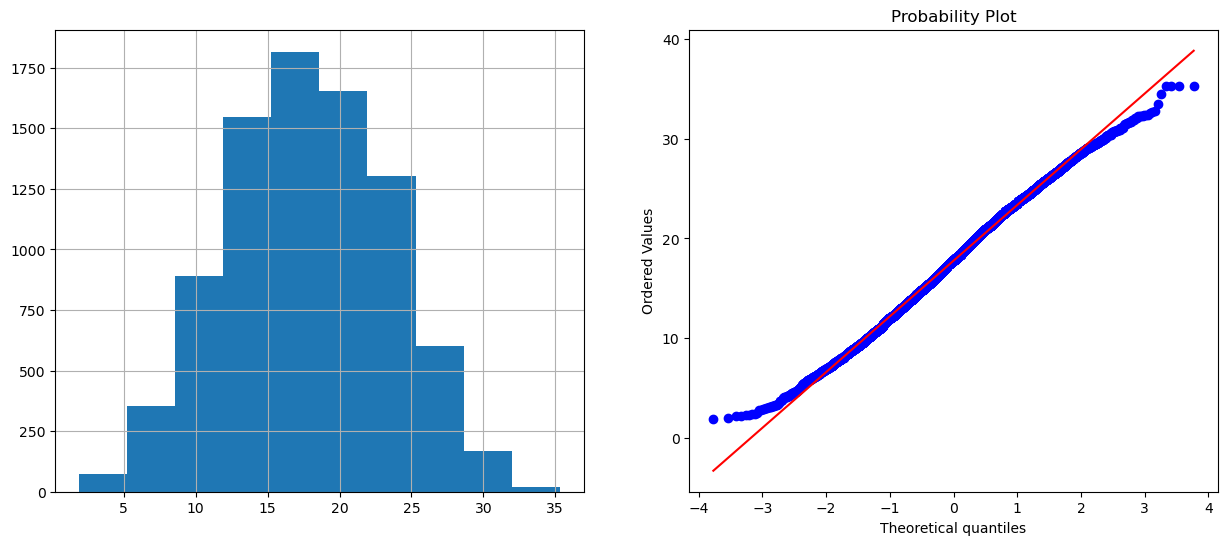

Temp3pm


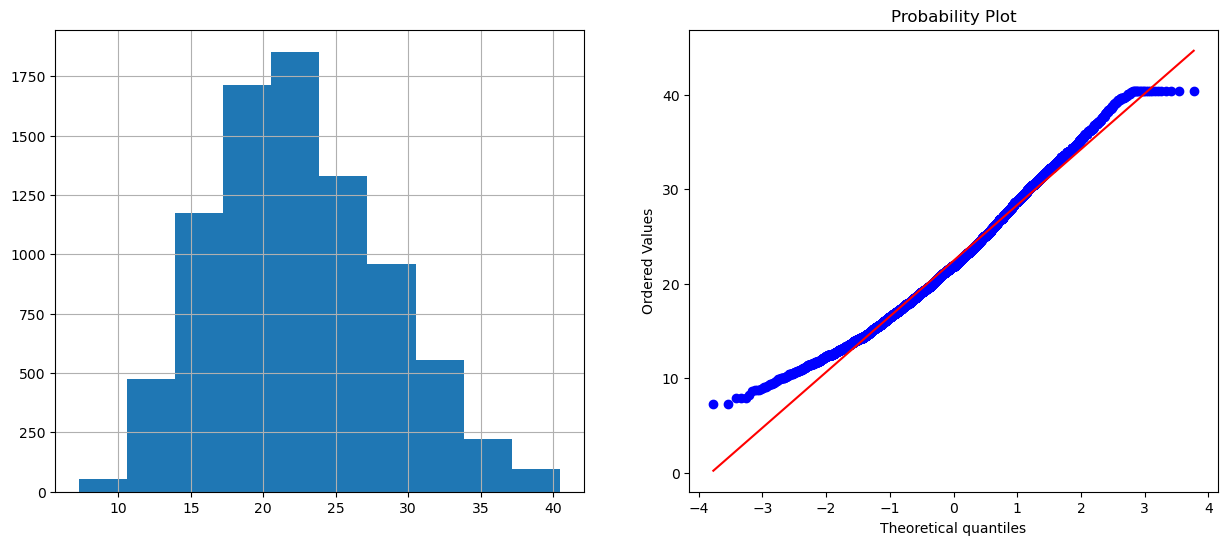

In [74]:
import scipy.stats as stats
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show();

In [75]:
df.to_csv("D:\preprocessed_1.csv", index=False)

In [135]:
df.RainTomorrow.value_counts()

0    6434
1    1991
Name: RainTomorrow, dtype: int64

# Balancing using SMOTE

In [136]:
from imblearn.over_sampling import SMOTE

In [76]:

x = df.drop(["RainTomorrow", "Date"], axis=1)
y = df["RainTomorrow"]
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Date_month,Date_day
0,30,13.4,22.9,0.6,3.0,13.8,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,0,12,1
1,30,7.4,25.1,0.0,2.2,7.6,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,0,12,2
2,30,12.9,25.7,0.0,4.6,7.7,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,0,12,3
3,30,9.2,28.0,0.0,1.8,8.0,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,0,12,4
4,30,17.5,32.3,1.0,3.8,11.9,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,49,2.8,23.4,0.0,6.4,1.2,15.0,31.0,13.0,13.0,13.0,11.0,51.0,24.0,1024.6,1020.3,8.0,4.0,10.1,22.4,0,6,21
8421,49,3.6,25.3,0.0,12.6,7.1,0.0,22.0,13.0,2.0,13.0,9.0,56.0,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,0,6,22
8422,49,5.4,26.9,0.0,4.2,13.0,3.0,37.0,13.0,3.0,9.0,9.0,53.0,24.0,1021.0,1016.8,6.0,5.0,12.5,26.1,0,6,23
8423,49,7.8,27.0,0.0,4.0,13.1,12.0,28.0,11.0,2.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,6,24


In [137]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [138]:

y.value_counts()

0    6434
1    6434
Name: RainTomorrow, dtype: int64

# Standard Scaling

In [140]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(x)

## PCA

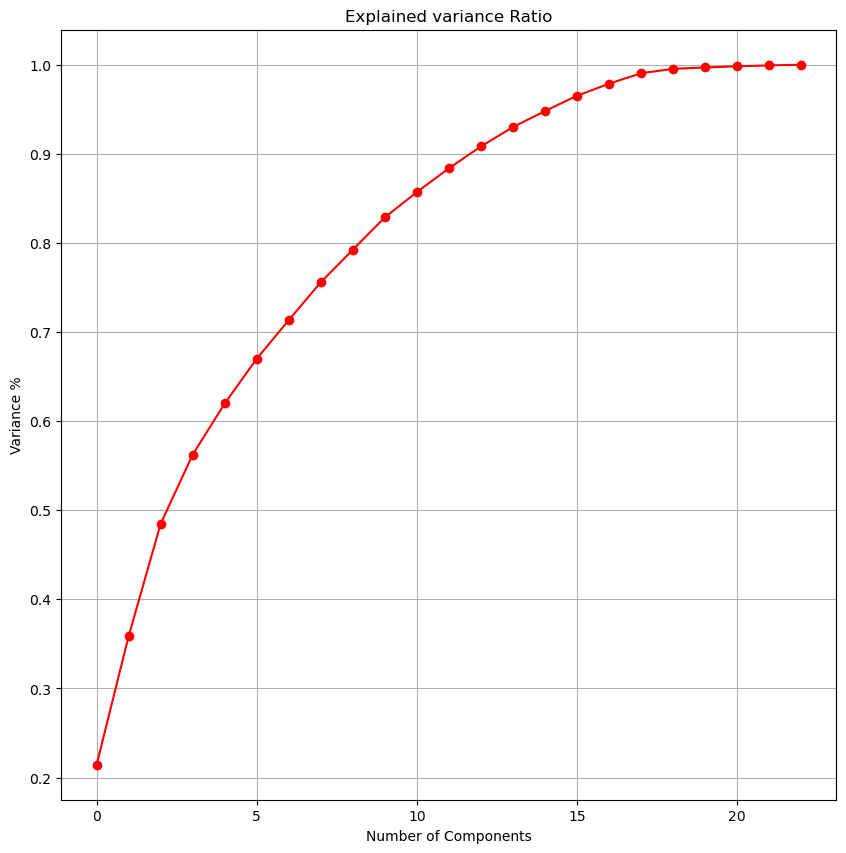

In [142]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_),'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [144]:
pca_new = PCA(n_components=23)
x_new = pca_new.fit_transform(X_scale)

In [145]:
principle_x=pd.DataFrame(x_new,columns=np.arange(23))

## MAchine Learning Model Building

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score,RocCurveDisplay

In [147]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (9007, 23)
Training target vector size: (9007,)
Test feature matrix size: (3861, 23)
Test target vector size: (3861,)


In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7788137788137788 on Random_state 157


In [149]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, y, random_state=9, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7637917637917638


Confusion matrix of Logistics Regression : 
 [[1497  376]
 [ 536 1452]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.74      0.80      0.77      1873
           1       0.79      0.73      0.76      1988

    accuracy                           0.76      3861
   macro avg       0.77      0.76      0.76      3861
weighted avg       0.77      0.76      0.76      3861



# KNN

In [150]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.2847228144478083
RMSE value for k=  2 is: 0.2887872632199755
RMSE value for k=  3 is: 0.35805743701971643
RMSE value for k=  4 is: 0.3511183892708032
RMSE value for k=  5 is: 0.3842266878161219
RMSE value for k=  6 is: 0.37154695268180854
RMSE value for k=  7 is: 0.40072454451925027
RMSE value for k=  8 is: 0.4004012491503496
RMSE value for k=  9 is: 0.4153241775940482
RMSE value for k=  10 is: 0.41156551044295414
RMSE value for k=  11 is: 0.42396483314796257
RMSE value for k=  12 is: 0.4254893430406701
RMSE value for k=  13 is: 0.426097619753011
RMSE value for k=  14 is: 0.4254893430406701
RMSE value for k=  15 is: 0.4288241876226012
RMSE value for k=  16 is: 0.42518487835549934
RMSE value for k=  17 is: 0.4324328699326486
RMSE value for k=  18 is: 0.430932924830751
RMSE value for k=  19 is: 0.4300304465106918
RMSE value for k=  20 is: 0.4318335170875305


In [151]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.7637917637917638


Confusion matrix : 
 [[1497  376]
 [ 536 1452]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.74      0.80      0.77      1873
           1       0.79      0.73      0.76      1988

    accuracy                           0.76      3861
   macro avg       0.77      0.76      0.76      3861
weighted avg       0.77      0.76      0.76      3861



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8513338513338513


Confusion matrix : 
 [[1587  286]
 [ 288 1700]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1873
           1       0.86      0.86      0.86      1988

    accuracy                           0.85      3861
   macro avg       0.85      0.85      0.85      3861
weighted avg       0.85      0.85      0

In [162]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier(),
      AdaBoostClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.76340326 0.71600622 0.68492618 0.74776525 0.78546444]
Mean Score : 0.7395130714602148
Std deviation : 0.03544761869415949




Cross Validation Score SVC() :

Score : [0.77078477 0.75796426 0.76456876 0.77497085 0.74038088]
Mean Score : 0.7617339045632866
Std deviation : 0.012127104595192466




Cross Validation Score GaussianNB() :

Score : [0.72766123 0.71095571 0.7020202  0.70773416 0.77730276]
Mean Score : 0.7251348125036426
Std deviation : 0.027444461080864332




Cross Validation Score DecisionTreeClassifier() :

Score : [0.76884227 0.76223776 0.83877234 0.82860474 0.78041197]
Mean Score : 0.7957738163723395
Std deviation : 0.031662924897854786




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.76146076 0.77156177 0.84304584 0.80800622 0.7602021 ]
Mean Score : 0.7888553386415804
Std deviation : 0.03216801343995253




Cross Validation Score RandomForestClassifier() :

Score : [0.87529138 0.871017

## Hyperparameter Tuning

In [155]:
from sklearn.model_selection import GridSearchCV

In [163]:
parameter= {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'],
              'min_samples_split':[3,5,8,11],
              'max_depth' : [10,20,30],
              'n_estimators' : [100,200,300,400]
             }

In [164]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 1/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.810 total time=   0.9s
[CV 2/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 2/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.815 total time=   0.9s
[CV 3/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 3/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.825 total time=   0.6s
[CV 4/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 4/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples

KeyboardInterrupt: 

In [165]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 17,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 17}

In [169]:
Final_mod = ExtraTreesClassifier(criterion='entropy',n_estimators= 17, max_depth=17 ,
                                 min_samples_split= 10, min_samples_leaf= 4)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8381248381248382


#### Check the classification report for that.

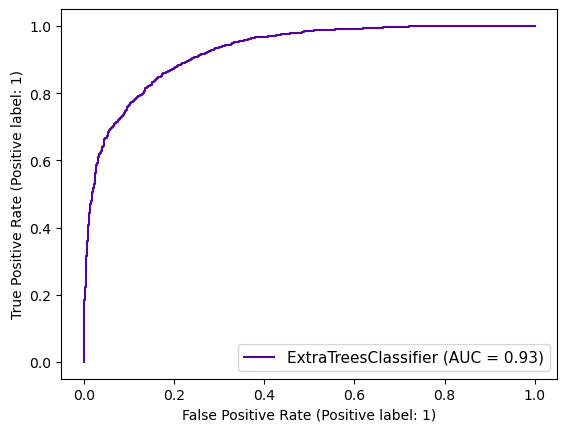

<Figure size 1000x1000 with 0 Axes>

Auc Score :
 0.8386374037068111


In [170]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
disp =RocCurveDisplay.from_estimator(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

#### Saving The Model

In [171]:
import joblib
joblib.dump(rf_fin_clf,"Rainforest.pkl")

['Rainforest.pkl']

#### Loading Model

In [172]:
# Prediction
prediction = Final_mod.predict(X_test)

In [174]:
Actual = np.array(y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred.head()

,Predicted Values
0,0
1,1
2,1
3,0
4,1


In [175]:
df_Pred.to_csv('D:\Rainforest.csv')